In [160]:
import pandas as pd

In [161]:
base = pd.read_excel('08. Analisando o engajamento no Instagram.xlsx')

In [162]:
# display(base.head(10))

In [163]:
base = base.drop('Visualizações',axis=1)

In [164]:
base.loc[base['Carrossel'].isnull(),'Carrossel'] = 'N'

In [165]:
display(base.head(10))

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,N,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,N,6379
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137


In [166]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    52 non-null     object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


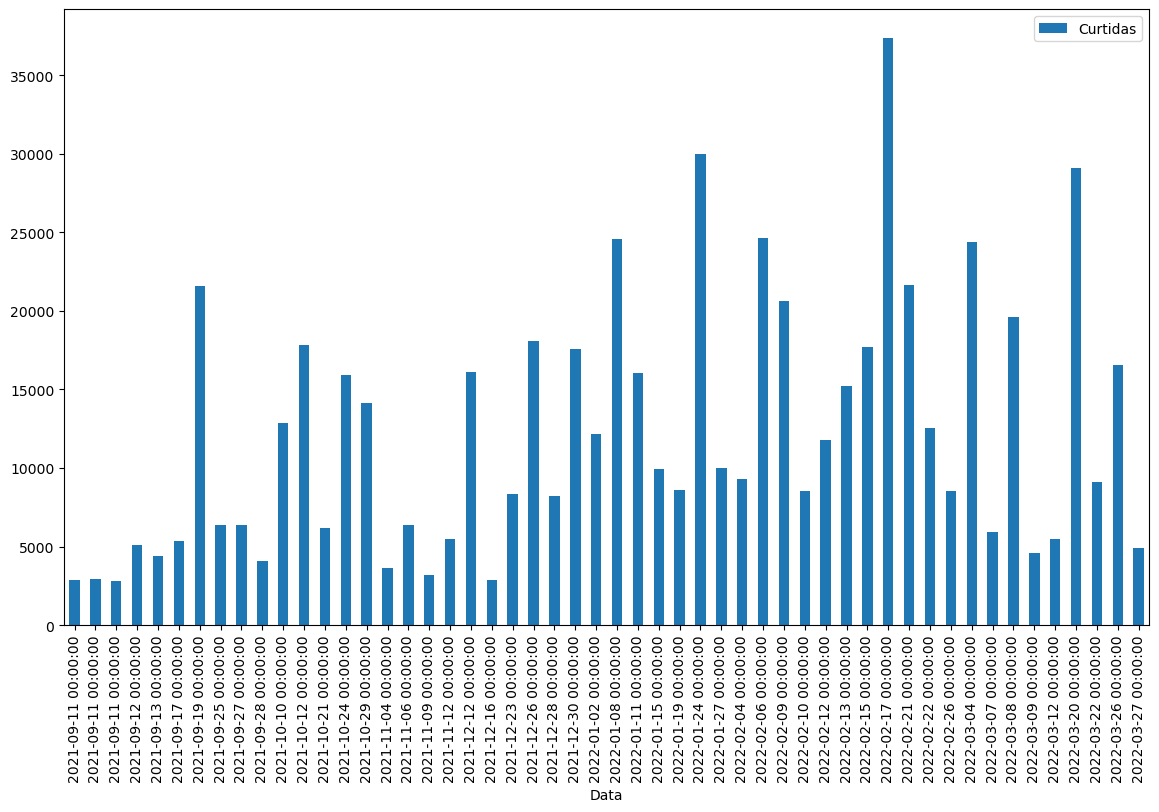

In [167]:
base.plot(kind="bar",x="Data",y="Curtidas",figsize=(14,8));

In [168]:
# base.plot(kind="bar",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

In [169]:
base.sort_values(by='Curtidas', ascending=False).head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,N,22449
34,Foto,2022-02-09,20660,292,Influenciadores,S,S,N,20952
45,Reels,2022-03-08,19621,275,Trends,S,S,N,19896


In [170]:
base.sort_values(by='Curtidas', ascending=True).head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437
46,Foto,2022-03-09,4613,50,Influenciadores,S,N,N,4663
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999


In [171]:
pd.options.display.float_format = '{:,.2f}'.format

In [172]:
base.groupby("Tipo")["Comentários"].count()


Tipo
Foto     36
IGTV      5
Reels     5
Vídeo     6
Name: Comentários, dtype: int64

In [196]:
base2 = base[base['Pessoas']=='S']

In [197]:
base2 = base2[base2['Campanhas']=='S']

In [210]:
base3 = base[base['Tipo']=='Vídeo']

In [213]:
base.groupby(["Pessoas",'Campanhas','Tipo'])["Curtidas"].mean()

Pessoas  Campanhas  Tipo 
N        N          Foto     2,869.00
                    Reels    5,934.50
                    Vídeo    4,007.50
         S          Foto     5,852.50
S        N          Foto    10,815.29
                    IGTV     6,833.40
                    Reels   12,894.00
         S          Foto    19,105.38
                    Reels   24,801.00
                    Vídeo   16,409.50
Name: Curtidas, dtype: float64

# Conclusões

- Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém
- Postagens em épocas de campanha também possuem um melhor engajamento
- Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca